In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
# def train_val_test_splitter(Xg, Xb, n_repeats=5, settings=[(0.98, 0.02)],):
    
#     DATA = {}

#     for setting in settings:

#         DATA[setting] = {}

#         for repeat in range(n_repeats):
            
#             DATA[setting][repeat] = {}

#             Lg = np.repeat(int(1), Xg.shape[0])  # Labels Good

#             Xg_train, Xg_test, Lg_train, Lg_test = train_test_split(Xg, Lg,
#                                                                     test_size=setting[-1], 
#                                                                     shuffle=True)

#             Xg_test, Xg_val, Lg_test, Lg_val = train_test_split(Xg_test, Lg_test,
#                                                                 test_size=0.5, 
#                                                                 shuffle=True)

#             Lb = np.repeat(int(0), Xb.shape[0])  # Labels Bad 
            
#             Xb_train, Xb_test, Lb_train, Lb_test = train_test_split(Xb, Lb,
#                                                                     test_size=setting[-1], 
#                                                                     shuffle=True)

#             Xb_test, Xb_val, Lb_test, Lb_val = train_test_split(Xb_test, Lb_test,
#                                                                 test_size=0.5, 
#                                                                 shuffle=True)

#             X_train = np.concatenate((Xg_train, Xb_train), axis=0)
#             X_val = np.concatenate((Xg_val, Xb_val), axis=0)
#             X_test = np.concatenate((Xg_test, Xb_test), axis=0)


#             L_train = np.concatenate((Lg_train, Lb_train), axis=0)
#             L_val = np.concatenate((Lg_val, Lb_val), axis=0)
#             L_test = np.concatenate((Lg_test, Lb_test), axis=0)


#             DATA[setting][repeat]['X_tr'] = X_train
#             DATA[setting][repeat]['X_vl'] = X_val
#             DATA[setting][repeat]['X_ts'] = X_test
#             DATA[setting][repeat]['y_tr'] = L_train
#             DATA[setting][repeat]['y_vl'] = L_val
#             DATA[setting][repeat]['y_ts'] = L_test
            
#     return DATA


#     # with open (os.path.join('SANC_computation', name+features_type+str(size)+'.pickle'), 'wb') as fp:
#     #     pickle.dump(data, fp)


In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [5]:
print(type(train_images), train_images.shape, len(train_images), train_images[1].shape)

<class 'numpy.ndarray'> (60000, 28, 28) 60000 (28, 28)


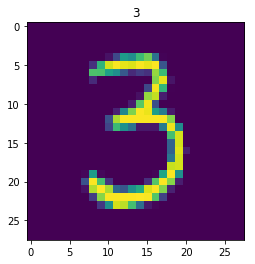

In [6]:
R = 50
plt.imshow(train_images[R])
plt.title(train_labels[R])
plt.show()

In [7]:
normal=1
normal_idx = np.where(train_labels==normal)[0]
abnormal_idx = np.where(train_labels!=normal)[0]
n_abnormals = int(len(normal_idx)/20)
idx_abnormals = np.random.choice(abnormal_idx, size=(n_abnormals))


mnist = np.zeros([len(normal_idx)+n_abnormals, train_images[0].reshape(1, -1).shape[1]+1])

In [9]:
r = 0
for idx in normal_idx:
    mnist[r, :-1] = train_images[idx].reshape(1, -1)
    mnist[r, -1] = 0
    r += 1
for idx_ in idx_abnormals:
    mnist[r, :-1] = train_images[idx_].reshape(1, -1)
    mnist[r, -1] = 1
    r += 1

In [11]:
# Xg = kdd_final[np.where(kdd_final[:, -1]==0)]
# Xb = kdd_final[np.where(kdd_final[:, -1]!=0)]
# Above code produces error due to memory limits

In [ ]:
Xg = mnist[np.where(mnist[:,-1]==0)].astype('float32')
Xb = mnist[np.where(mnist[:,-1]!=0)].astype('float32')

In [ ]:
n_repeats=5
settings=[(0.98, 0.02)]

DATA = {}

for setting in settings:

    DATA[setting] = {}

    for repeat in range(n_repeats):

        DATA[setting][repeat] = {}

        normal=repeat
        normal_idx = np.where(train_labels==normal)[0]
        abnormal_idx = np.where(train_labels!=normal)[0]
        n_abnormals = int(len(normal_idx)/10)
        idx_abnormals = np.random.choice(abnormal_idx, size=(n_abnormals))

        mnist = np.zeros([len(normal_idx)+n_abnormals, train_images[0].reshape(1, -1).shape[1]+1])
        r = 0
        for idx in normal_idx:
            mnist[r, :-1] = train_images[idx].reshape(1, -1)
            mnist[r, -1] = 0
            r += 1
        for idx_ in idx_abnormals:
            mnist[r, :-1] = train_images[idx_].reshape(1, -1)
            mnist[r, -1] = 1
            r += 1

        Xg = mnist[np.where(mnist[:,-1]==0)].astype('float32')
        Xb = mnist[np.where(mnist[:,-1]!=0)].astype('float32')

        Lg = np.repeat(int(1), Xg.shape[0])  # Labels Good

        Xg_train, Xg_test, Lg_train, Lg_test = train_test_split(Xg, Lg,
                                                                test_size=setting[-1], 
                                                                shuffle=True)

        Xg_test, Xg_val, Lg_test, Lg_val = train_test_split(Xg_test, Lg_test,
                                                            test_size=0.5, 
                                                            shuffle=True)

        Lb = np.repeat(int(0), Xb.shape[0])  # Labels Bad 

        Xb_train, Xb_test, Lb_train, Lb_test = train_test_split(Xb, Lb,
                                                                test_size=setting[-1], 
                                                                shuffle=True)

        Xb_test, Xb_val, Lb_test, Lb_val = train_test_split(Xb_test, Lb_test,
                                                            test_size=0.5, 
                                                            shuffle=True)

        X_train = np.concatenate((Xg_train, Xb_train), axis=0)
        X_val = np.concatenate((Xg_val, Xb_val), axis=0)
        X_test = np.concatenate((Xg_test, Xb_test), axis=0)


        L_train = np.concatenate((Lg_train, Lb_train), axis=0)
        L_val = np.concatenate((Lg_val, Lb_val), axis=0)
        L_test = np.concatenate((Lg_test, Lb_test), axis=0)


        DATA[setting][repeat]['X_tr'] = X_train
        DATA[setting][repeat]['X_vl'] = X_val
        DATA[setting][repeat]['X_ts'] = X_test
        DATA[setting][repeat]['y_tr'] = L_train
        DATA[setting][repeat]['y_vl'] = L_val
        DATA[setting][repeat]['y_ts'] = L_test

# with open(os.path.join('matrices', 'MNIST.pickle'), 'wb') as fp:
#     pickle.dump(DATA, fp)

In [18]:
a = np.zeros([3, 5])
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [19]:
a[1,:]

array([0., 0., 0., 0., 0.])

In [20]:

with open (os.path.join('matrices', 'MNIST.pickle'), 'rb') as fp:
    tmp_ = pickle.load(fp)

l = 0
for settings, repeats in tmp_.items():
    print("setting:", settings)
    for repeat, matrices in repeats.items(): 
#         print(l, repeat, matrices['X_tr'].shape, matrices['X_vl'].shape, matrices['X_ts'].shape)
        print("dims:", matrices['X_tr'][20].shape, matrices['X_ts'][20].shape, matrices['X_vl'][20].shape)
        l +=1

setting: (0.98, 0.02)
dims: (785,) (785,) (785,)
dims: (785,) (785,) (785,)
dims: (785,) (785,) (785,)
dims: (785,) (785,) (785,)
dims: (785,) (785,) (785,)


In [ ]:
n_abnormals